<a href="https://colab.research.google.com/github/wangjalen7/project_gss/blob/main/gss%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Created an account and selected variables from the GSS explorer (https://gssdataexplorer.norc.org/variables/vfilter), then exported them into my own excel

# DATA CLEANING FOR WWWHR VARIABLE

data = pd.read_excel('./data/wwwhr.xlsx')
# print(data.head())
# print(data.describe())

codes_to_remove = ['.i:  Inapplicable', '.p:  Not applicable (I have not faced this decision)/Not imputable', '.d:  Do not Know/Cannot Choose', '.n:  No answer']

# Remove rows with the specified codes to get rid of unusable data
cleaned_data = data[~data['wwwhr'].isin(codes_to_remove)].copy()

# Replace "0 hours" with 0 and "168 hours" with 168
cleaned_data['wwwhr'] = cleaned_data['wwwhr'].replace("0 hours", 0)
cleaned_data['wwwhr'] = cleaned_data['wwwhr'].replace("168 hours", 168)

# Convert 'wwwhr' to numeric, making non-convertible values NaN
cleaned_data['wwwhr'] = pd.to_numeric(cleaned_data['wwwhr'], errors='coerce')

# Remove all rows with NaN values in 'wwwhr'
cleaned_data.dropna(subset=['wwwhr'], inplace=True)

print(cleaned_data.head())
print(cleaned_data.describe())


       year  id_  wwwhr
38116  2000    1    5.0
38119  2000    4    2.0
38120  2000    5    1.0
38122  2000    7    0.0
38124  2000    9    1.0
               year           id_         wwwhr
count  17186.000000  17186.000000  17186.000000
mean    2012.449901   1559.351682     11.127080
std        7.547115   1030.925901     15.244951
min     2000.000000      1.000000      0.000000
25%     2006.000000    721.000000      2.000000
50%     2014.000000   1446.000000      5.000000
75%     2021.000000   2216.000000     15.000000
max     2022.000000   4506.000000    168.000000


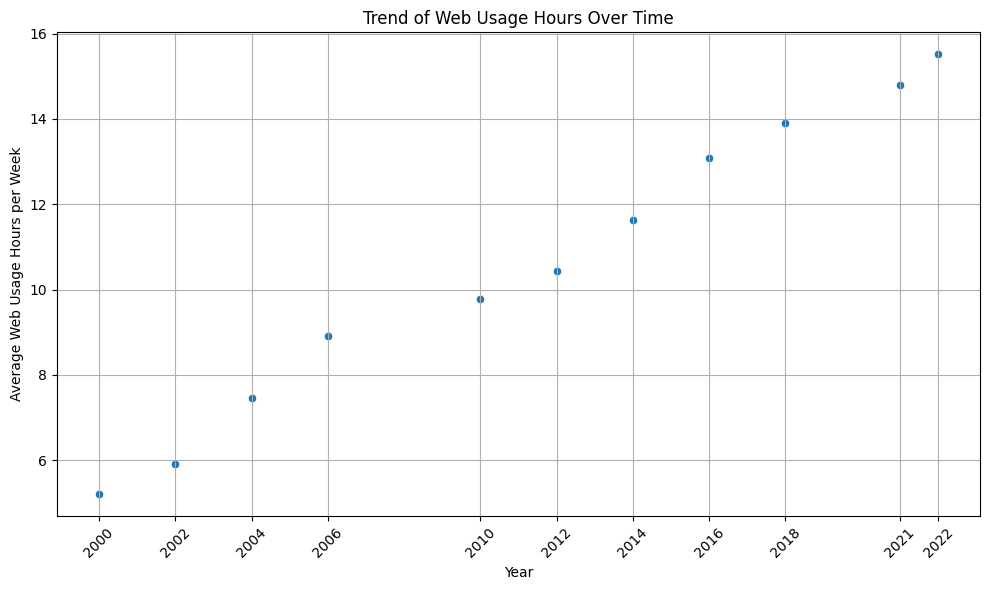

,year,wwwhr
0,2000,5.208417
1,2002,5.907878
2,2004,7.458554
3,2006,8.909548
4,2010,9.769524
5,2012,10.445535
6,2014,11.618299
7,2016,13.078135
8,2018,13.906021
9,2021,14.802514


In [62]:
# VISUALIZATION FOR WWWWHR VARIABLE
# We see average web usage increase each year, indicating a wider acceptance of technology/internet usage as time passes and technology advances.

# Calculate the average web usage hours per year
yearly_avg_hours = cleaned_data.groupby('year')['wwwhr'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_avg_hours, x='year', y='wwwhr')
plt.title('Trend of Web Usage Hours Over Time')
plt.xlabel('Year')
plt.ylabel('Average Web Usage Hours per Week')
plt.grid(True)
plt.xticks(yearly_avg_hours['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

yearly_avg_hours

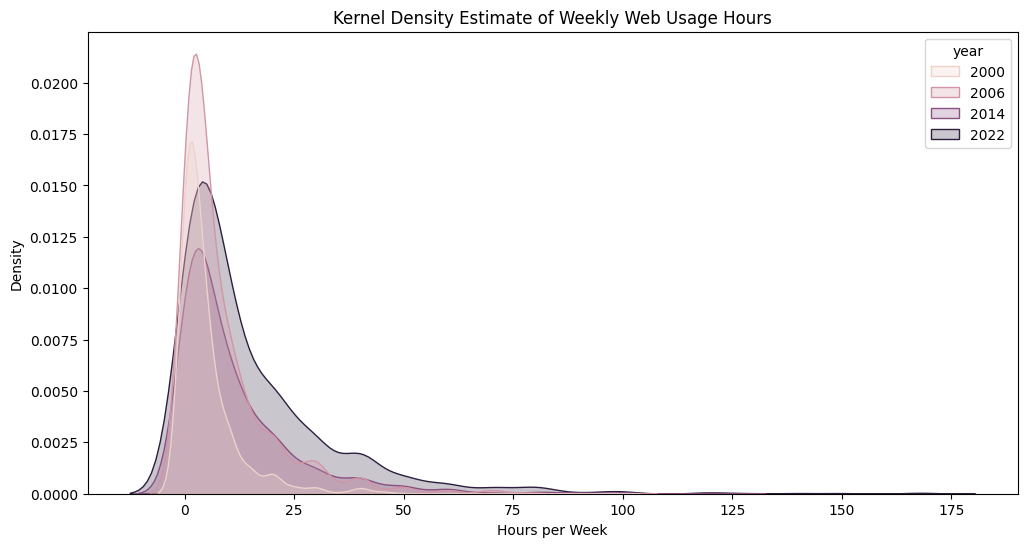

In [63]:
# With the KDE plot, we see a clear rightward shift in the peaks from 2000 to 2022. This indicates an overall increase in the number of hours spent on the web per week over time.
# It suggests that, on average, people are using the web more as the years progress. The width of the distributions seems to broaden slightly over time as well, indicating that
# the variability in web usage hours among individuals has increased.

# Filter the dataset for a few selected years for clarity
selected_years = cleaned_data[cleaned_data['year'].isin([2000, 2006, 2014, 2022])]

# Plotting
plt.figure(figsize=(12, 6))
sns.kdeplot(data=selected_years, x='wwwhr', hue='year', fill=True)
plt.title('Kernel Density Estimate of Weekly Web Usage Hours')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.show()

In [64]:
# DATA CLEANING FOR WEBMOB VARIABLE

data = pd.read_excel('./data/webmob.xlsx')
# print(data.head())
# print(data.describe())

codes_to_remove.extend(['.n:  No answer', '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web'])

# Remove rows with the specified codes to get rid of unusable data
cleaned_data = data[~data['webmob'].isin(codes_to_remove)].copy()

# print(cleaned_data.head())
# print(cleaned_data.describe())

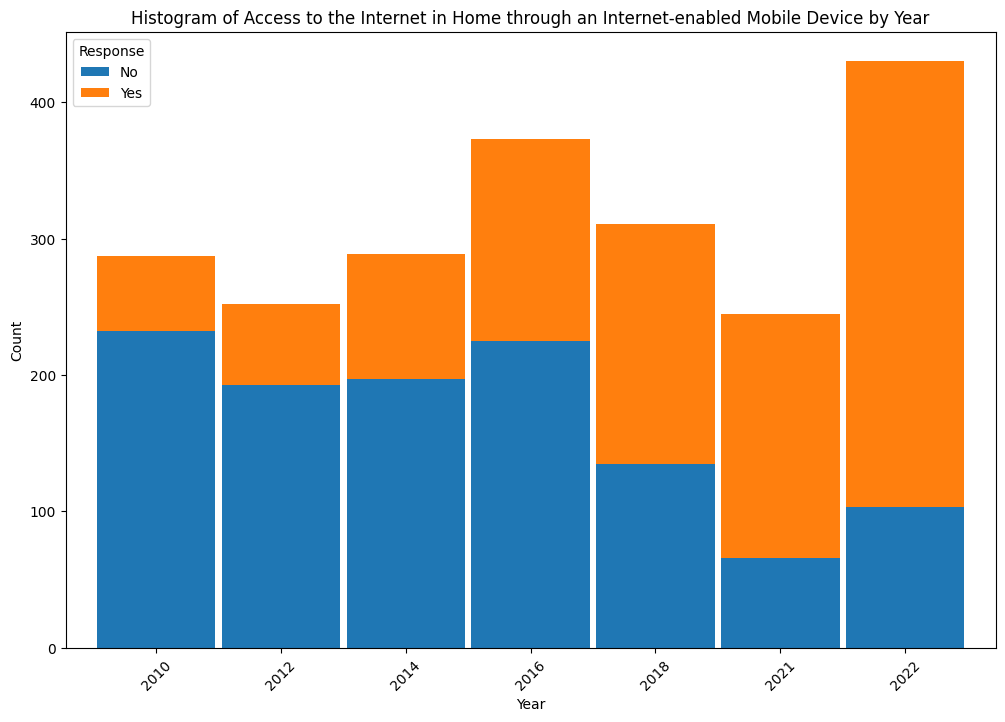

,Year,Total Responses
0,2010,287
1,2012,252
2,2014,289
3,2016,373
4,2018,311
5,2021,245
6,2022,430


In [74]:
# VISUALIZATION FOR WEBMOB VARIABLE
# Although the number of people polled varied each year, we see over the years that the proportion of people responding yes increased.
# Similarly, the amount of people responding no increased. This indicates that more people were gaining internet access in their homes through phones,
# indicating a positive relationship with technological advancement.

# Calculate the counts for each response per year.
response_counts_by_year = cleaned_data.groupby(['year', 'webmob']).size().unstack(fill_value=0)

response_counts_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.95)
plt.title('Histogram of Access to the Internet in Home through an Internet-enabled Mobile Device by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()


total_responses_by_year = cleaned_data.groupby('year')['webmob'].count()
total_responses_by_year_df = total_responses_by_year.reset_index()
total_responses_by_year_df.columns = ['Year', 'Total Responses']
total_responses_by_year_df
